In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = "/content/youth_tobacco_survey_yts_data.csv"
df = pd.read_csv(file_path)
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9794 entries, 0 to 9793
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        9794 non-null   int64  
 1   locationabbr                9794 non-null   object 
 2   locationdesc                9794 non-null   object 
 3   topictype                   9794 non-null   object 
 4   topicdesc                   9794 non-null   object 
 5   measuredesc                 9794 non-null   object 
 6   datasource                  9794 non-null   object 
 7   response                    7548 non-null   object 
 8   data_value_unit             9794 non-null   object 
 9   data_value_type             9794 non-null   object 
 10  data_value                  9369 non-null   float64
 11  data_value_footnote_symbol  425 non-null    object 
 12  data_value_footnote         425 non-null    object 
 13  data_value_std_err          9369 

(None,
    year locationabbr locationdesc                  topictype  \
 0  2015           AZ      Arizona  Tobacco Use – Survey Data   
 1  2015           AZ      Arizona  Tobacco Use – Survey Data   
 2  2015           AZ      Arizona  Tobacco Use – Survey Data   
 3  2015           AZ      Arizona  Tobacco Use – Survey Data   
 4  2015           AZ      Arizona  Tobacco Use – Survey Data   
 
            topicdesc                                        measuredesc  \
 0  Cessation (Youth)        Percent of Current Smokers Who Want to Quit   
 1  Cessation (Youth)        Percent of Current Smokers Who Want to Quit   
 2  Cessation (Youth)        Percent of Current Smokers Who Want to Quit   
 3  Cessation (Youth)  Quit Attempt in Past Year Among Current Cigare...   
 4  Cessation (Youth)  Quit Attempt in Past Year Among Current Cigare...   
 
   datasource response data_value_unit data_value_type  ...  \
 0        YTS      NaN               %      Percentage  ...   
 1        YTS    

In [ ]:
df.columns

Index(['year', 'locationabbr', 'locationdesc', 'topictype', 'topicdesc',
       'measuredesc', 'datasource', 'response', 'data_value_unit',
       'data_value_type', 'data_value', 'data_value_footnote_symbol',
       'data_value_footnote', 'data_value_std_err', 'low_confidence_limit',
       'high_confidence_limit', 'sample_size', 'gender', 'race', 'age',
       'education', 'geolocation', 'topictypeid', 'topicid', 'measureid',
       'stratificationid1', 'stratificationid2', 'stratificationid3',
       'stratificationid4', 'submeasureid', 'displayorder'],
      dtype='object')

In [ ]:
df_selected = df[['gender', 'locationabbr', 'data_value']].dropna()

label_encoders = {}
for col in ['gender', 'locationabbr']:
    le = LabelEncoder()
    df_selected[col] = le.fit_transform(df_selected[col])
    label_encoders[col] = le

df_selected['response'] = (df_selected['data_value'] > df_selected['data_value'].median()).astype(int)

X = df_selected[['gender', 'locationabbr']]
y = df_selected['response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df_selected.head()

,gender,locationabbr,data_value,response
6,2,2,3.2,0
7,1,2,3.2,0
8,0,2,3.1,0
9,2,2,12.5,1
10,1,2,12.9,1


In [ ]:
len(X_train)

7495

In [ ]:
len(X_test)

1874

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn

KNeighborsClassifier(n_neighbors=10)

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
result = {}
result[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
         }
result

{'Decision Tree': {'Accuracy': 0.5218783351120597,
  'F1 Score': 0.4885844748858447,
  'Confusion Matrix': array([[550, 398],
         [498, 428]])}}

In [ ]:
svm = SVC(kernel='linear')
svm

SVC(kernel='linear')

In [ ]:
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
res = {}
res[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
         }
res

{'Decision Tree': {'Accuracy': 0.5309498399146211,
  'F1 Score': 0.5188834154351396,
  'Confusion Matrix': array([[521, 427],
         [452, 474]])}}

In [ ]:
Logistic_Regression = LogisticRegression()
Logistic_Regression

LogisticRegression()

In [ ]:
Logistic_Regression.fit(X_train, y_train)
y_pred = Logistic_Regression.predict(X_test)
re = {}
re[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
         }
re

{'Decision Tree': {'Accuracy': 0.5586979722518677,
  'F1 Score': 0.5594033031433138,
  'Confusion Matrix': array([[522, 426],
         [401, 525]])}}

In [ ]:
Decision_Tree = DecisionTreeClassifier()
Decision_Tree

DecisionTreeClassifier()

In [ ]:
Decision_Tree.fit(X_train, y_train)
y_pred = Decision_Tree.predict(X_test)
r = {}
r[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
         }
r

{'Decision Tree': {'Accuracy': 0.5560298826040555,
  'F1 Score': 0.5443592552026287,
  'Confusion Matrix': array([[545, 403],
         [429, 497]])}}

<ipython-input-35-1ecd47d91c7a>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_selected['gender'], df_selected['locationabbr'], cmap='coolwarm', alpha=0.6)


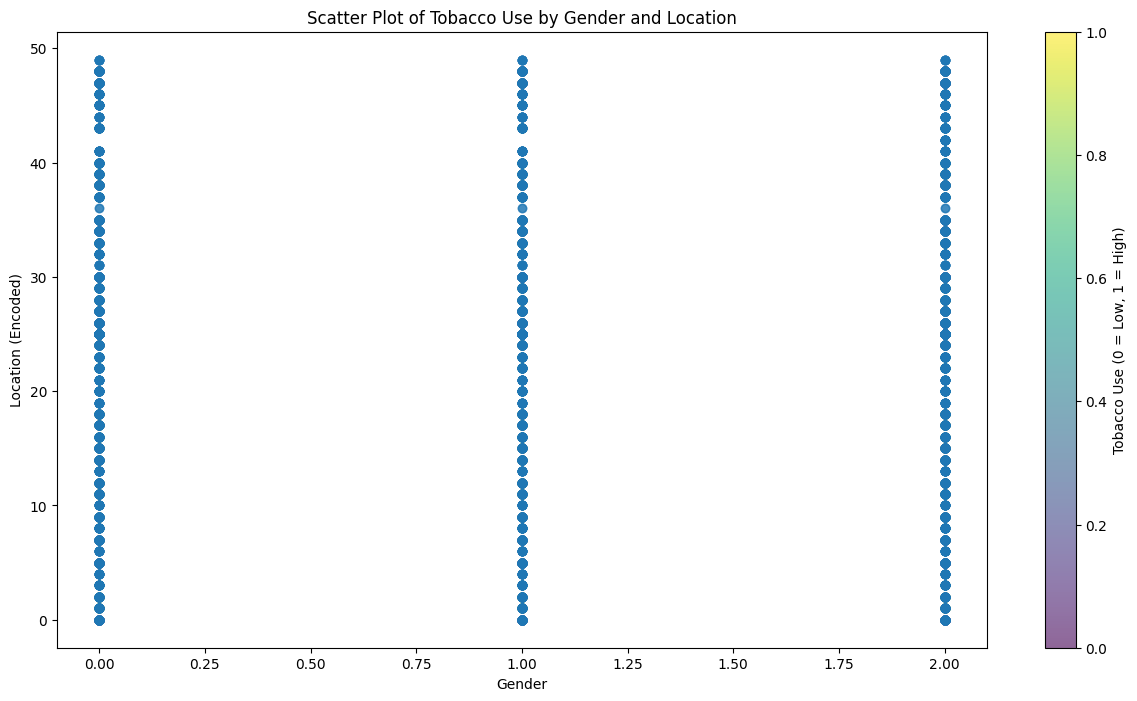

In [ ]:
plt.figure(figsize=(15, 8))
plt.scatter(df_selected['gender'], df_selected['locationabbr'], cmap='coolwarm', alpha=0.6)
plt.xlabel("Gender")
plt.ylabel("Location (Encoded)")
plt.title("Scatter Plot of Tobacco Use by Gender and Location")
plt.colorbar(label="Tobacco Use (0 = Low, 1 = High)")
plt.show()